import libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
import pickle

In [44]:
data=pd.read_csv('C:\projects\ml_projects\end_to_end_project_withflask\car data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DASARADHA\AppData\Local\Temp\ipykernel_21700\531773542.py:1: SyntaxWarning: invalid escape sequence '\p'
  data=pd.read_csv('C:\projects\ml_projects\end_to_end_project_withflask\car data.csv')


In [45]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
data.shape

(301, 9)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [49]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

there is null values in our data

In [50]:
data.duplicated().any()

True

it says duplicate values are present in our data

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data.shape

(299, 9)

In [53]:
data.duplicated().any()

False

In [54]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [55]:
categorical_features=['Fuel_Type','Seller_Type','Transmission']

In [56]:
for col in categorical_features:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [57]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [58]:
a=data['Car_Name'].value_counts().head()

<Axes: xlabel='Fuel_Type'>

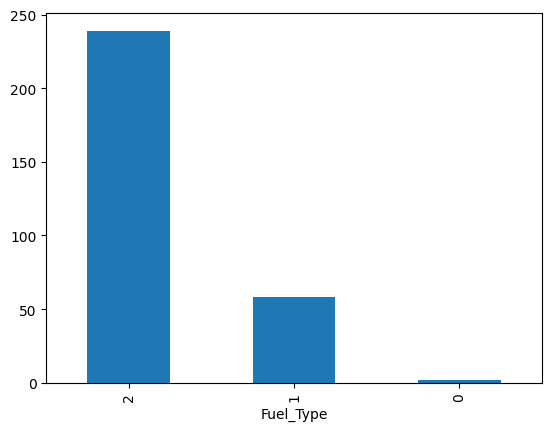

In [59]:
data['Fuel_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Seller_Type'>

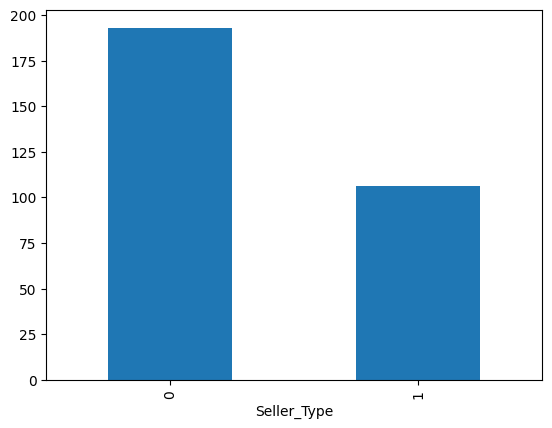

In [60]:
data['Seller_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Transmission'>

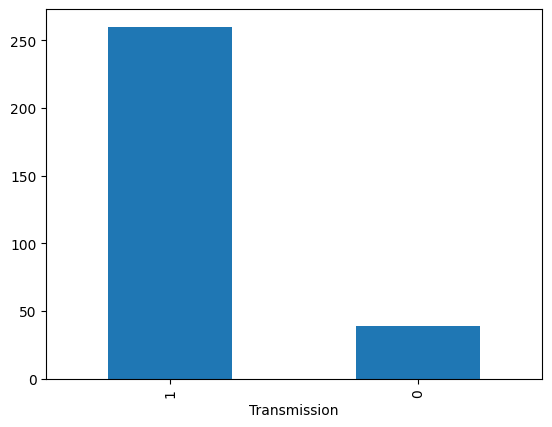

In [61]:
data['Transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='Owner'>

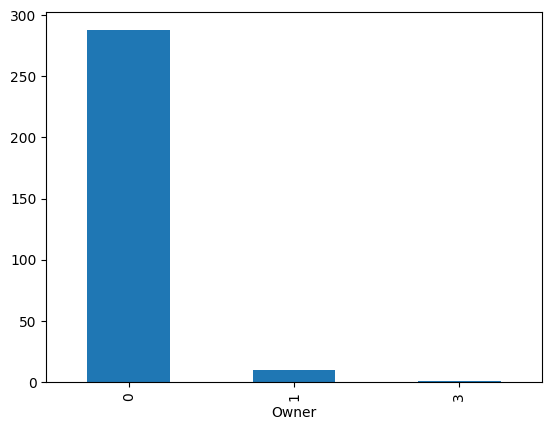

In [62]:
data['Owner'].value_counts().plot(kind='bar')

<Axes: xlabel='Year'>

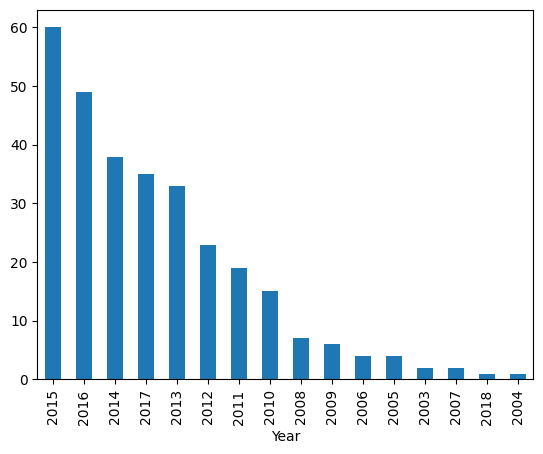

In [63]:
data['Year'].value_counts().plot(kind='bar')

<Axes: xlabel='Selling_Price', ylabel='Count'>

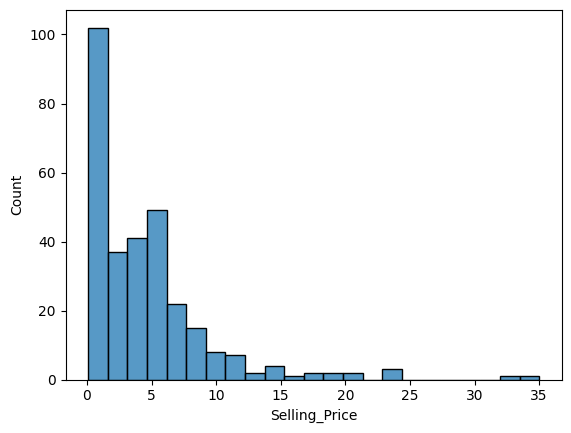

In [64]:
sns.histplot(data['Selling_Price'])

In [65]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

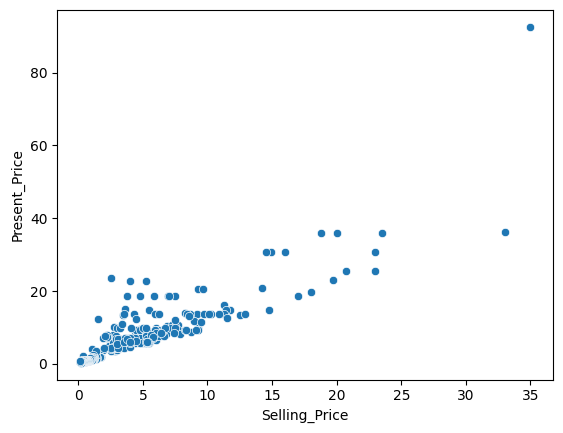

In [66]:
sns.scatterplot(x=data['Selling_Price'],y=data['Present_Price'])

<Axes: xlabel='Kms_Driven', ylabel='Present_Price'>

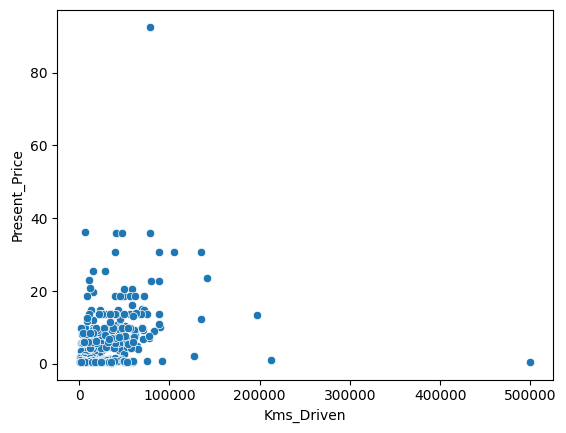

In [67]:
sns.scatterplot(x=data['Kms_Driven'],y=data['Present_Price'])

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

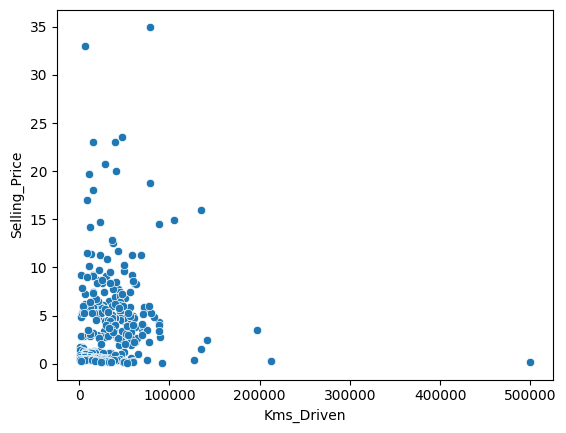

In [68]:
sns.scatterplot(x=data['Kms_Driven'],y=data['Selling_Price'])

In [69]:
x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [71]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [72]:
lr=LinearRegression()
lasso=Lasso(alpha=0.21)
ridge=Ridge(alpha=0.1)

In [73]:
lr.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [74]:
lr_y_pred=lr.predict(x_test)
lasso_y_pred=lasso.predict(x_test)
ridge_y_pred=ridge.predict(x_test)

In [75]:
lr_accuracy=r2_score(lr_y_pred,y_test)

In [76]:
lasso_accuracy=r2_score(lasso_y_pred,y_test)

In [77]:
ridge_accuracy=r2_score(ridge_y_pred,y_test)

In [78]:
a=pd.DataFrame({'model':['linearregression','lasso','ridge'],
                'r2_score':[lr_accuracy,lasso_accuracy,ridge_accuracy]})

<Axes: xlabel='model', ylabel='r2_score'>

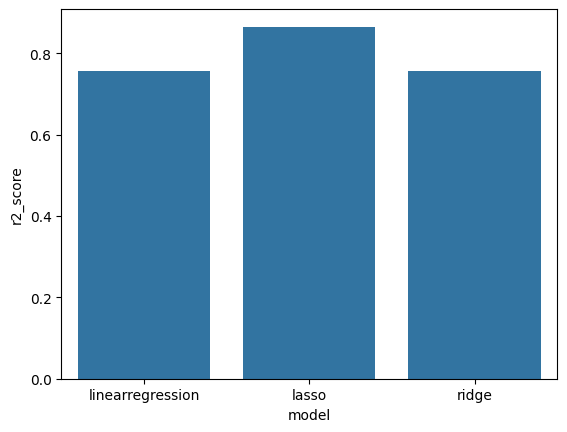

In [79]:
sns.barplot(x=a['model'],y=a['r2_score'])

Finally i gor best r2_score with lasso regression algorithm , so i train whole data to lasso algorithm

In [80]:
ss=StandardScaler()

In [81]:
x=ss.fit_transform(x)

In [82]:
lasso.fit(x,y)

Lasso(alpha=0.21)

In [83]:
model_file=open('model.pkl','wb')
ss_file=open('ss.pkl','wb')
pickle.dump(lasso,model_file)
pickle.dump(ss,ss_file)

In [84]:
model=pickle.load(open('model.pkl','rb'))

In [85]:
model

Lasso(alpha=0.21)

In [86]:
ss=pickle.load(open('ss.pkl','rb'))

In [87]:
ss

StandardScaler()